# <center>Homework #5</center> 

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
from sklearn.svm import SVC
import sympy 

![p1](./hw5_1.png)

1.<br>
For primal formulation of linear soft -margin support vector machine, we want to minimize:  
$$E_{aug} = \frac {1}{2} w^Tw + C\sum\limits_{n=1}^{N}\xi_n, \\ s.t.\,\,\,y_n(w^Txn + b)>= 1- \xi _n \,\,\,and \,\, \xi_n >= 0 \,\,for \,\, all\,\, n\\ $$
There are N+d+1 variables and there are 2N constrains

![p2](./hw5_2_5.png)

2.<br>


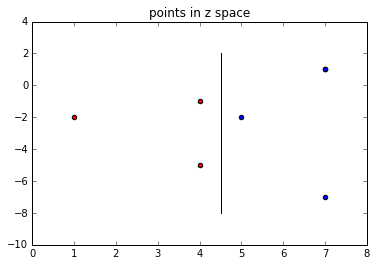

In [2]:
def transform_P2(x):
    z1 = x[1] ** 2 - 2 * x[0] + 3
    z2 = x[0] ** 2 - 2 * x[1] - 3
    return [z1, z2]

x1 = [1, 0, -1]
x2 = [0, 1, -1]
x3 = [0, -1, -1]
x4 = [-1, 0, 1]
x5 = [0, 2, 1]
x6 = [0, -2, 1]
x7 = [-2, 0, 1]
Z = [transform_P2(x) + [x[-1]] for x in [x1, x2, x3, x4, x5, x6, x7]]
for z in Z:
    plt.scatter(z[0], z[1], c=['red', 'blue'][z[2] == 1])
plt.plot([4.5, 4.5], [-8, 2], c='black')
plt.title("points in z space")
plt.show()

The hyperplane is $z_1 = 4.5$

3.<br>

In [3]:
X = np.array([x1[:-1], x2[:-1], x3[:-1], \
              x4[:-1], x5[:-1], x6[:-1], x7[:-1]])
y = np.array([-1, -1, -1, 1, 1, 1, 1])
clf = SVC(C=1e10, kernel='poly', degree=2,gamma=1, coef0=1, shrinking=False)
clf.fit(X, y)
print('alpha =\n', clf.dual_coef_)
print('support vectors are:\n',clf.support_vectors_)

alpha =
 [[-0.64491963 -0.76220325  0.88870349  0.22988879  0.2885306 ]]
support vectors are:
 [[ 0.  1.]
 [ 0. -1.]
 [-1.  0.]
 [ 0.  2.]
 [ 0. -2.]]


4.<br>

The transformation of x is $\Phi (x) = (1, \sqrt 2x_1, \sqrt 2 x_2, x_1^2, x_2^2)$, the corresponding $z_i$ for support vectors are:  
$$[1, 0, \sqrt 2, 0, 1] \,\,with \,\,-1$$
$$[1, 0, -\sqrt 2, 0, 1] \,\,with \,\,-1$$
$$[1, -\sqrt 2, 0, 1, 0] \,\,with \,\,1$$
$$[1, 0, 2\sqrt 2, 0, 4] \,\,with  \,\,1$$
$$[1, 0, -2\sqrt 2, 0, 4] \,\,with \,\,1$$
and the w is $\sum\limits_{sv}\alpha_ny_nz_n = [1.11e{(-16)} \,\, -1.257 \,\,2.22e{(-16)}\,\,8.89e{(-01)} \,\,6.67e{(-01)}]$, (see code below)  

The equation of the curve is:  
$$2.814 -1.257x_1 - 0.332x_2 + 0.889x_1^2 + 3.481x_2^2  - 1.666= 0$$

In [4]:
sv1 = np.array([1,  0,              math.sqrt(2),     0, 1])
sv2 = np.array([1,  0,             -math.sqrt(2),     0, 1])
sv3 = np.array([1, -math.sqrt(2),   0,                1, 0])
sv4 = np.array([1,  0,              2 * math.sqrt(2), 0, 4])
sv5 = np.array([1,  0,             -2 * math.sqrt(2), 0, 4])
y_sv = np.array([-1, -1, 1, 1, 1])
w = np.array([0., 0., 0., 0., 0.])
svs = [sv1, sv2, sv3, sv4, sv5]
for i in range(len(clf.dual_coef_[0])):
    w += clf.dual_coef_[0][i] *  svs[i]  
print("weights of w:",w)


weights of w: [  1.11022302e-16  -1.25681653e+00   2.22044605e-16   8.88703494e-01
   6.66554655e-01]


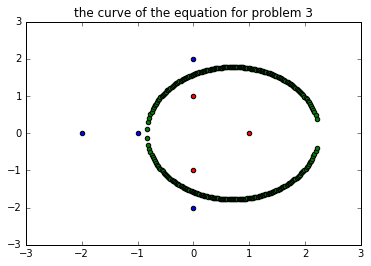

In [5]:
for x in [x1, x2, x3, x4, x5, x6, x7]:
    plt.scatter(x[0], x[1],c=['red', 'blue'][x[-1] == 1])

X1 = []
X2 = []
for i in range(153):
    x1_ = -0.83 + 0.02 * i
    try:
        x2_ = sympy.Symbol('x2_')
        x2_ = sympy.solve(2.22e-16 * x2_ + 6.67e-01 * x2_ ** 2 - 1.666 + 1.11e-16 - 1.257e+00 * x1_ + 8.89e-01 * x1_ ** 2, x2_)
        X1.append(x1_)
        X2.append(x2_)
    except:
        pass
for i in range(153):
    plt.scatter(X1[i], X2[i][0],c='green')
    plt.scatter(X1[i], X2[i][1], c='green')
plt.title("the curve of the equation for problem 3")
plt.show()

5.<br>
For problem 2, the equation of the curve is $x_2^2 - 2x_1 - 1.5 = 0$

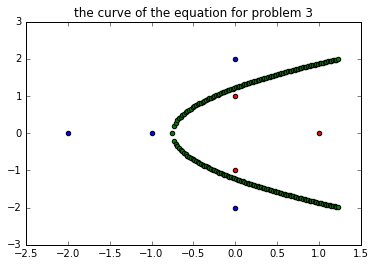

In [6]:
for x in [x1, x2, x3, x4, x5, x6, x7]:
    plt.scatter(x[0], x[1],c=['red', 'blue'][x[-1] == 1])

X1 = []
X2 = []
for i in range(100):
    x1_ = -0.75 + 0.02 * i
    try:
        x2_ = sympy.Symbol('x2_')
        x2_ = sympy.solve(x2_ ** 2 - 2 * x1_ - 1.5, x2_)
        X1.append(x1_)
        X2.append(x2_)
    except:
        pass
for i in range(100):
    plt.scatter(X1[i], X2[i][0],c='green')
    if i != 0:
        plt.scatter(X1[i], X2[i][1], c='green')
plt.title("the curve of the equation for problem 3")
plt.show()

As you can see, the two curve is not the same and the curve in problem 4 seems better

![p6](./hw5_6_10.png)

6.<br>
$\underset{R\in \Re , c \in \Re ^d}{min} \,\,\,\, \underset{\lambda _n >=0}{max}\,\,L(R,c, \lambda) = \underset{R\in \Re , c \in \Re ^d}{min} \,\,\,\, \underset{\lambda _n >=0}{max}\,\,\,R^2 + \sum_{n = 1}^{N}\lambda _n (||x_n -c ||^2 - R^2)$

7.<br>
primal feasile: $||x_n - c||^2 < R^2$  
dual feasible: $\lambda _n >= 0$  
dual-inner optimal: $R(1- \sum_{n = 1}^{N}\lambda _n)= 0\,\,$  and  $\,\,\sum_{n = 1}^{N}\lambda _nC - \sum_{n=1}^{N}\lambda_nx_n = 0$  
primal-inner:  $\lambda_n(||x_n - c|| ^ 2 - R^2) = 0$  

From dual-inner optimal, we know if $\sum_{n = 1}^{N}\lambda_n \neq 0$, $c = \frac{\sum_{n = 1}^{N}\lambda_nx_n} {\sum_{n = 1}^{N}\lambda_n}$

8.<br>
$\underset{R\in \Re , c \in \Re ^d}{min} \,\,\,\, \underset{\lambda _n >=0}{max}\,\,L(R,c, \lambda) = \underset{R\in \Re , c \in \Re ^d}{min} \,\,\,\, \underset{\lambda _n >=0}{max}\,\,\,R^2 + \sum_{n = 1}^{N}\lambda _n (||x_n -c ||^2 - R^2) = \\ \underset{R\in \Re , c \in \Re ^d}{min} \,\,\,\, \underset{\lambda _n >=0}{max}\,\,L(R,c, \lambda) = \,\,\,\,\underset{\lambda _n >=0}{max}\,\,\,\underset{R\in \Re , c \in \Re ^d}{min} \,\,\,\, R^2 + \sum_{n = 1}^{N}\lambda _n (||x_n -c ||^2 - R^2)$  

Let $\frac{\partial L}{\partial R} = 0$, we get:   

$\underset{\lambda _n >=0, R(1- \sum_{n = 1}^{N}\lambda _n)= 0}{max}\,\,\,\underset{c \in \Re ^d}{min} \,\,\,\, \sum_{n = 1}^{N}\lambda _n ||x_n -c ||^2$  

Let $\frac{\partial L}{\partial c} = 0$, because $R > 0, \sum_{n=1}^{N}\lambda _n = 1$, we get:  

$\underset{\lambda _n >=0,\sum_{n=1}^{N}\lambda _n = 1, R(1- \sum_{n = 1}^{N}\lambda _n)= 0, \,\,C =\sum_{n=1}^{N}\lambda_nx_n}{max}\,\,\,\, \sum_{n = 1}^{N}\lambda _n ||x_n -\sum_{m=1}^{N}\lambda_mx_m ||^2$



9.<br>
primal feasile: $||z_n - c||^2 < R^2$  
dual feasible: $\lambda _n >= 0$  
dual-inner optimal: $R(1- \sum_{n = 1}^{N}\lambda _n)= 0\,\,$  and  $\,\,\sum_{n = 1}^{N}\lambda _nC - \sum_{n=1}^{N}\lambda_nz_n = 0$  
primal-inner:  $\lambda_n(||z_n - c|| ^ 2 - R^2) = 0$  

From dual-inner optimal, we know if $\sum_{n = 1}^{N}\lambda_n \neq 0$, $c = \frac{\sum_{n = 1}^{N}\lambda_nz_n} {\sum_{n = 1}^{N}\lambda_n}$

Finally we will solve:  
$\underset{\lambda _n >=0,\sum_{n=1}^{N}\lambda _n = 1, R(1- \sum_{n = 1}^{N}\lambda _n)= 0, \,\,C =\sum_{n=1}^{N}\lambda_nz_n}{max}\,\,\,\, \sum_{n = 1}^{N}\lambda _n ||z_n -\sum_{m=1}^{N}\lambda_mz_m ||^2 \\ 
= \sum_{n = 1}^{N}\lambda_n z^T_nz_n -2\sum_{n = 1}^{N}\sum_{m = 1}^{N} \lambda_n\lambda_mx_n^Tx_m + \sum_{n = 1}^{N}\lambda_n\sum_{m = 1}^{N}\sum_{k = 1}^{N}\lambda_m\lambda_kx_m^Tx_k \\ = 
\sum_{n = 1}^{N}\lambda_n K(x_n,x_n) -\sum_{n = 1}^{N}\sum_{m = 1}^{N} \lambda_n\lambda_mK(x_n,x_m)$




10.<br>
For some i that $\lambda_i \neq 0$, we have  
$R^2 = ||z_i - c||^2 \\= z_i^Tz_i - 2z_i^Tc + c^Tc
\\ = z_i^Tz_i - 2z_i^T\sum_{n = 1}^{N}\lambda_nz_n + \sum_{n = 1}^{N}\lambda_nz_n^T\sum_{m = 1}^{N}\lambda_mz_m\\
=K(x_i,x_i) - 2\sum_{n = 1}^{N}\lambda_nK(x_i,x_n) + \sum_{n = 1}^{N}\sum_{m = 1}^{N}\lambda_n\lambda_mK(x_n,x_m)$  

$R = \sqrt {K(x_i,x_i) - 2\sum_{n = 1}^{N}\lambda_nK(x_i,x_n) + \sum_{n = 1}^{N}\sum_{m = 1}^{N}\lambda_n\lambda_mK(x_n,x_m)}$

![p11](./hw5_11.png)

11.<br>
$\frac{1}{2}w^Tw + C\sum\limits_{n = 1}^{N}\xi = \frac{1}{2}w^Tw +\frac{1}{2}\sum\limits_{n = 1}^{N}(\sqrt{2C}\xi_n)^2$  
Let $\tilde w = \left [ \begin {matrix} w \\ \sqrt{2C}\xi_1 \\ \vdots \\ \sqrt{2C}\xi_N \end {matrix} \right ], \,\,\,and\,\,\, \tilde x_n = \left [ \begin {matrix} x_n \\ 0\\ \vdots \\ \frac{\sqrt{\frac{1}{2C}}}{y_n} \\ \vdots  \end {matrix} \right ]$ where the (N+n)th element is $\frac{\sqrt{\frac{1}{2C}}}{y_n}$  
Then the original problem becomes:  
$\underset{w,b,\xi}{min}\,\,\,\frac{1}{2}\tilde w^T \tilde w$  
subject to $y_n(\tilde w^T\tilde x_n + b)>= 1$

$w = \left [ \begin {matrix} I_{d \times d} & 0 \\ 0 & 0_{N\times N} \end{matrix} \right ]\tilde w$

![p12](./hw5_12_13.png)

12.<br>
[a] is valid since $[K(x, x^`)]_{n\times n} = [K_1(x, x^`)]_{n\times n} + [K_2(x, x^`)]_{n\times n}$ is semi positive definite  
[b] is not valid. Suppose $K_2(x, x^`) = -2 K_1(x, x^`)$, then $[K(x, x^`)]_{n\times n} = [K_1(x, x^`)]_{n\times n} - 2[K_1(x, x^`)]_{n\times n} = -[K_1(x, x^`)]_{n\times n}$, not semi positive definite  
[c] is valid. Because $[K_1(x, x^`)]\,\,\, and \,\,\, [K_2[x,x^`]]$ are semi positive definite, so their dot product is still semi positive definite.  
[4] is not valid. Suppose $[K_1(x, x^`)] = \left [ \begin{matrix} 16 & 1 \\ 1 & 16 \end{matrix} \right ], [K_2(x, x^`)] = \left [ \begin{matrix} 4 & 1 \\ 1 & 4 \end{matrix} \right ]$, then $K = K_2 / K_1 = \left [ \begin{matrix} 0.25 & 1 \\ 1 & 0.25 \end{matrix} \right ]$, not semi positive definite

13.<br>
[a] is not valid if $[K(x, x^`)] = \left [ \begin{matrix} 1 & 1 \\ 1 & 1 \end{matrix} \right ]$  
[b] is valid  
[c] is not valid if $[K(x, x^`)] = \left [ \begin{matrix} \frac{4}{5} & \frac{1}{5} \\ \frac{1}{5} & \frac{4}{5} \end{matrix} \right ]$  
[d] is valid. $\large\sum\limits_{i,j}y_iy_jK_{ij} = \sum\limits_{i,j}y_iy_j\frac {1}{1 - K_{1,ij}} = \sum\limits_{i,j}y_iy_j\frac {K_{1,ij}}{(K_{1,ij})(1 - K_{1,ij})} > \sum\limits_{i,j}y_iy_j {K_{1,ij}} >=0$

![p14](./hw5_14.png)

14.<br>
$g_{SVM}(z_m) = \,\,sign(\sum\limits_{n}\alpha_ny_nz_nz_m) + y_n - (\sum\limits_{n}\alpha_ny_nz_nz_s) \\
= \,\,sign(\sum\limits_{n}\alpha_ny_nK(z_n,z_m)) + y_n - (\sum\limits_{n}\alpha_ny_nK(z_n,z_s)) \\ 
= \,\,sign(\sum\limits_{n}\alpha_ny_n\frac{\tilde K(z_n,z_m) - q}{p} + y_n - (\sum\limits_{n}\alpha_ny_n\frac{\tilde K(z_n,z_s) - q}{p}) \\
= \,\,sign(\sum\limits_{n}\alpha_ny_n\frac{\tilde K(z_n,z_m)}{p} + y_n - (\sum\limits_{n}\alpha_ny_n\frac{\tilde K(z_n,z_s)}{p}) \\
=\,\,sign(\sum\limits_{n}\frac{\alpha_n}{p}y_n\tilde K(z_n,z_m) + y_n - (\sum\limits_{n}\frac{\alpha_n}{p}y_n\tilde K(z_n,z_s))$  
Let $\frac{\alpha_n}{p} = \tilde\alpha_n$, then $\tilde C = \frac{C}{p}$ becomes new $C$

![p15](./hw5_15_17.png)

In [7]:
train_data = np.loadtxt('features.train.txt')
test_data = np.loadtxt('features.test.txt')
def generate_data(data):
    X = data[:, 1:]
    y = data[:, 0]
    return X, y

def zero_vs_one(y, digit):
    return (y == digit) * 1
logc = [-6, -4, -2, 0, 2]


15.<br>

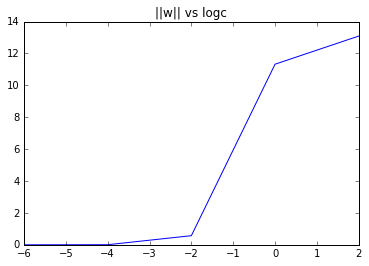

In [8]:
X_train, y = generate_data(train_data)
y_0 = zero_vs_one(y, 0)
w_array = []
for i in range(len(logc)):
    lin_clf = SVC(C=10**(logc[i]), kernel='linear', shrinking=False)
    lin_clf.fit(X_train, y_0)
    w_array.append(lin_clf.coef_)
w_length = [np.linalg.norm(w_array[i]) for i in range(len(w_array))]
plt.figure()
plt.plot(logc, w_length)
plt.title('||w|| vs logc')
plt.show()

When C increases, the ||w|| becomes shorter for the reason that the margin have to shrink to decrease the violations of points

16.<br>

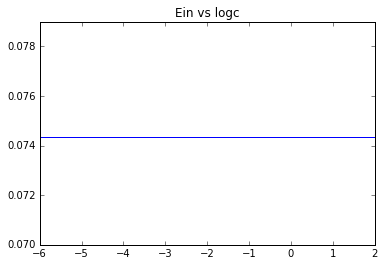

In [9]:
logc = [-6, -4, -2, 0, 2]
X_train, y_train = generate_data(train_data)
y_8_train = zero_vs_one(y_train, 8)
#X_test, y_test = generate_data(test_data)
#y_8_test = zero_vs_one(y_test, 8)
Ein_array = []
dual_coef_array = []
for i in range(len(logc)):
    poly_clf = SVC(C=10**(logc[i]), kernel='poly', degree=2, gamma=1, coef0=1, shrinking=False)
    poly_clf.fit(X_train, y_8_train)
    Ein_array.append(1 - poly_clf.score(X_train, y_8_train))
    dual_coef_array.append(np.abs(poly_clf.dual_coef_))
plt.figure()
plt.plot(logc, Ein_array)
plt.title('Ein vs logc')
plt.show()

As C increses, Ein does not change too much

17.<br>

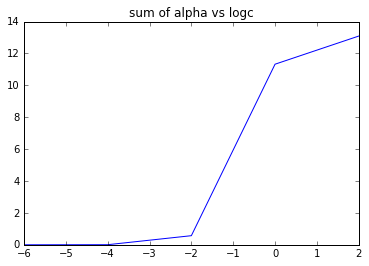

In [10]:
dual_sum_array = [np.sum(dual) for dual in dual_coef_array]
plt.figure()
plt.plot(logc, w_length)
plt.title('sum of alpha vs logc')
plt.show()

![p_18](./hw5_18_20.png)

18.<br>

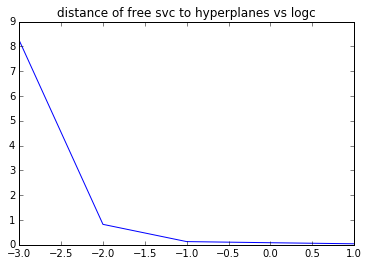

In [11]:
X_train, y_train = generate_data(train_data)
y_0_train = zero_vs_one(y_train, 0)
X_test, y_test = generate_data(test_data)
y_0_test = zero_vs_one(y_test, 0)
gamma = 100
logc = [-3, -2, -1, 0, 1]
distance_array = []
logcs = []

for i in range(len(logc)):
    gauss_clf = SVC(C=10**(logc[i]), kernel='rbf',shrinking=False, gamma=gamma)
    gauss_clf.fit(X_train, y_0_train)
    dual_coefs = np.abs(gauss_clf.dual_coef_)
    svs = X_train[list(gauss_clf.support_)]
    K = [[np.exp(-gamma * np.linalg.norm(xi - xj) ** 2) for xj in svs] for xi in svs]
    w_length = np.sqrt(np.matmul(gauss_clf.dual_coef_[0].T,np.matmul(K, gauss_clf.dual_coef_[0])))
    for j in range(len(dual_coefs[0])):
        if dual_coefs[0][j] > 0 and dual_coefs[0][j] < 10 ** (logc[i]):
            X = gauss_clf.support_vectors_[j].reshape(1, -1)
            distance_array.append(np.abs(gauss_clf.decision_function(X)[0] / w_length))
            logcs.append(logc[i])
            break
plt.figure()
plt.plot(logcs, distance_array)
plt.title("distance of free svc to hyperplanes vs logc")
plt.show()

The distance decreases as C increases

19.<br>


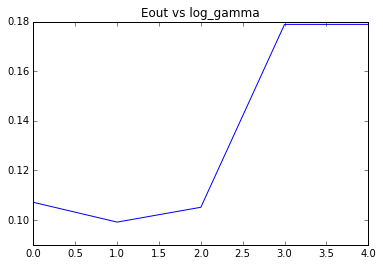

In [12]:
C = 0.1
log_gamma = [0, 1, 2, 3, 4]
Eout_array = []
for i in range(len(log_gamma)):
    gauss_clf = SVC(C=C, kernel='rbf',shrinking=False, gamma=10**log_gamma[i])
    gauss_clf.fit(X_train, y_0_train)
    Eout_array.append(1 - gauss_clf.score(X_test, y_0_test))

plt.figure()
plt.plot(log_gamma, Eout_array)
plt.title("Eout vs log_gamma")
plt.show()

As log_gamma increases, Eout increases

20.<br>

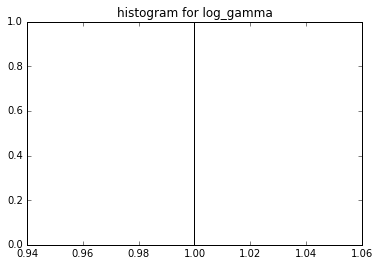

In [13]:
C = 0.1
log_gamma = [0, 1, 2, 3, 4]
def sample_for_val_train(random_seed, X_train, y_train):
    np.random.seed(random_seed)
    sample_index = np.random.permutation(len(y_train))
    val_feature = X_train[sample_index[:1000]]
    val_label = y_train[sample_index[:1000]]
    train_feature = np.delete(X_train, sample_index[:1000], axis=0)
    train_label = np.delete(y_train, sample_index[:1000], axis=0)
    return val_feature, val_label, train_feature, train_label

log_gamma_array = []
for i in range(5):
    val_feature, val_label, train_feature, train_label = sample_for_val_train(i, X_train, y_0_train)
    score_max=0
    best_gamma = log_gamma[0]
    for j in range(len(log_gamma)):
        gauss_clf = SVC(C=C, kernel='rbf',shrinking=False, gamma=10**(log_gamma[j]))
        gauss_clf.fit(train_feature, train_label)
        score = gauss_clf.score(val_feature, val_label)
        if score > score_max:
            score_max = score
            best_gamma = log_gamma[j]
    log_gamma_array.append(best_gamma)
    
bins = [-1 + i for i in range(6)]
plt.hist(bins, log_gamma_array )
plt.title("histogram for log_gamma")
plt.show()

![p21](./hw5_21.png)